<a href="https://colab.research.google.com/github/swecomic/xray/blob/dev/train_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

fatal: destination path 'xray' already exists and is not an empty directory.
loading annotations into memory...
Done (t=14.28s)
creating index...
index created!
2020-08-02 10:56:25.603515 : [ XrayDataloader ] isValid check len : 137761
2020-08-02 11:04:23.721719 : [ XrayDataloader ] Empty file found
2020-08-02 11:04:23.744992 : [ XrayDataloader ] Dataset Created
2020-08-02 11:04:23.746154 : [ Train ] get_data_loader: loader make complete, total dataset : 131204


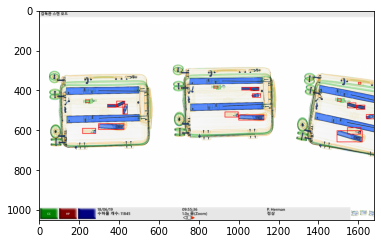

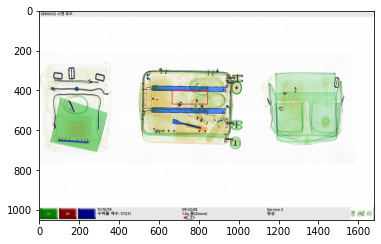

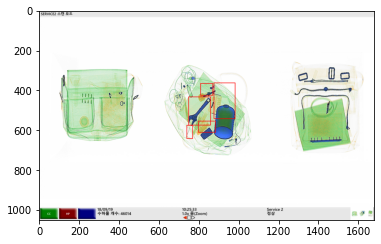

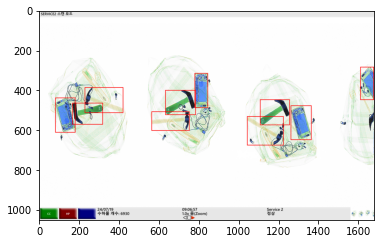

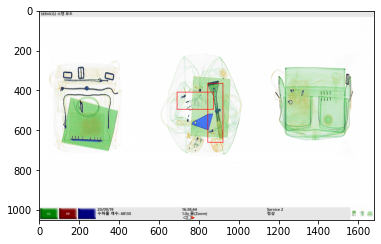

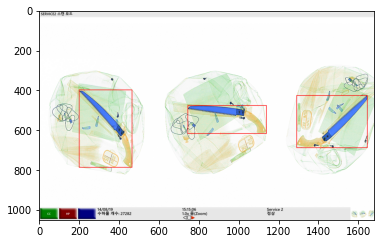

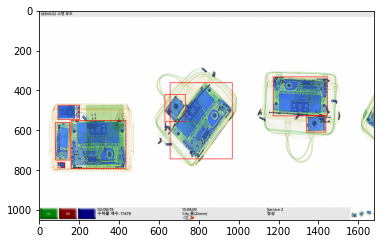

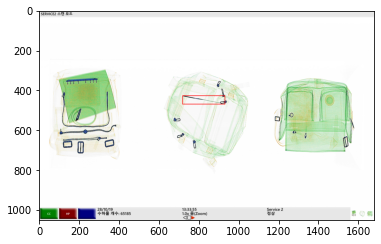

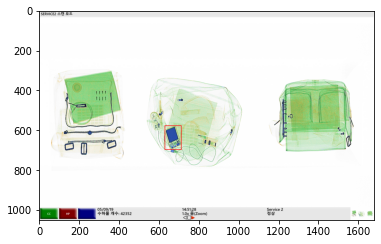

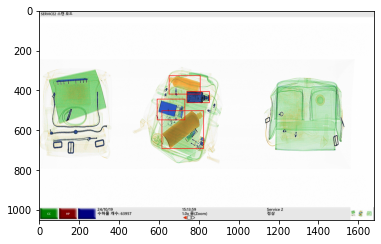

In [4]:
!git clone -b dev --single-branch https://github.com/swecomic/xray

######[IMPORT MODULE]#######
from xray.Utils import xrayDataLoader as x_loader
from xray.Utils.logger import log
import os
import random
import numpy as np
import torch
import matplotlib.pyplot as plt

from PIL import Image, ImageDraw

######[GOLBAL VLAUE]#######
# Logger
Tag = 'Train'

# parameters
train_batch_size = 32

def check_dir(path):
    if path == 'colab':
        train_data_dir = '/content/drive/' + 'Shared drives' + '/YS_NW/2.Data/Train/Data/'
        train_coco = '/content/drive/Shared drives/YS_NW/2.Data/Train/Meta/CoCo/coco_rapiscan.json'
    elif path == 'google_drive':
        train_data_dir = 'G:/공유 드라이브/YS_NW/2.Data/Train/Data/'
        train_coco = 'G:/공유 드라이브/YS_NW/2.Data/Train/Meta/CoCo/coco_rapiscan.json'
    else:
        train_data_dir = '/data/jiylee/dataset/xray/Train/Data/'
        train_coco = '/data/jiylee/dataset/xray/Train/Meta/CoCo/coco_rapiscan.json'

    return train_data_dir, train_coco


def get_data_loader():
    train_data_dir, train_data_coco = check_dir(LOCATION_PATH)
    _xraydataloader = x_loader.XrayDataLoader(root=train_data_dir, annotation=train_data_coco,
                                          batch_size=train_batch_size)
    _data_loader = _xraydataloader.get_data_loader()
    log(Tag, 'get_data_loader: loader make complete, total dataset : ' + str(len(_data_loader.dataset)))
    return _xraydataloader, _data_loader,

def make_label_location(bb):
    text_x = bb[0] + 1
    text_y = bb[1] + 5
    label_text = (text_x, text_y)
    return label_text

# show image
def check_dataset(data_set, num_of_item):
    sample = random.sample(range(0, len(data_set) - 1), num_of_item)
    for i in sample:
        plt.figure(figsize=(10,8))
        sample_img = data_set[i][0]
        sample_anno = data_set[i][1]
        bb = np.array(sample_anno["boxes"], dtype=np.float32)
        filename = np.array(sample_anno["filename"])
        class_names = np.array(sample_anno["class_names"])
        original = plt.subplot(2,1,2)
        for i in range(len(bb)):
            crop_img = sample_img.crop(bb[i])
            box_fig = plt.subplot(2, len(bb), i+1)
            box_img = np.array(crop_img)
            box_fig.imshow(box_img)
            box_fig.set_title(class_names[i])
            box_fig.axis('off')
        for i in range(len(bb)):
            draw = ImageDraw.Draw(sample_img)
            draw.rectangle(bb[i], outline='red', width =3)
        np_sample = np.array(sample_img)
        original.imshow(np_sample)
        plt.suptitle(filename)
        plt.tight_layout()
        plt.show()
    return sample

if __name__ == '__main__':
    # location
    LOCATION_PATH = 'colab'
    device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
    xray_loader, data_loader = get_data_loader()
    sample = check_dataset(data_loader.dataset, 1)